In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

## Import

In [2]:
db_path = '../data/beer.db'

conn = sqlite3.connect(db_path)
query = "SELECT * FROM prepped_data"

df = pd.read_sql(query, conn)

In [4]:
df.shape

(102598, 216)

In [5]:
df.head()

,username,beer_name,ABV,IBU,global_rating,total,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,...,beertype_Table Beer,beertype_Traditional Ale,beertype_Wheat Beer - American Pale Wheat,beertype_Wheat Beer - Other,beertype_Wheat Wine,beertype_Winter Ale,beertype_Winter Warmer,beertype_Witbier,beertype_Zoigl,user_rating
0,tnt,Society & Solitude #7,8.0,44.159369,4.38,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
1,tnt,Riwaka Single Hop Pale Ale,5.2,44.159369,4.14,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.00
2,tnt,"Walk, Don't Run",3.7,44.159369,4.10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.50
3,tnt,Czech Two,4.1,39.000000,3.81,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
4,tnt,Spirit of Revolt,8.2,52.000000,3.82,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.00


# Find Similar Users. Build Model on their Data, Test on my Data

## 1. Similarity Matrix - Impute with 0

In [63]:
piv =  pd.pivot_table(data=df, values='user_rating', index='username', columns='beer_name', 
                      aggfunc='mean', fill_value=0).reset_index()
piv.head()

beer_name,username,!Wild Blend! (Morango+Amora),"""33"" Export","""Body"" System","""British Bitter"" English Pale Ale","""Calcium"" Blood Orange","""Craft Beer"" Dark Lager Dry Hopped Oct. 2017","""Cream Soda"" Wheat IPA","""Cult of Pekko"" Hop-Scotch IPA (2017)","""K"" is for Kriek",...,分 桃 (Fēn Táo),分 桃 (Fēn Táo) (Blend 2),废都 (Two Lost Capitals),日本から来たネコ (Some Cat From Japan),日本で人気がある Big In Japan DDH IPA,木島平村 Hard Cider #39,藻細工S-IPA (mosaic S-IPA),調和,黄雪 (おうせき) - Yellow Snow,광화문 Seoulite Ale
0,AFernan25,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AlexKress,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Asier05,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Audyoh,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Boat,0.449727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
X = piv[piv['username'] == 'tsharp93'].drop('username', axis=1)
Y = piv[piv['username'] != 'tsharp93'].drop('username', axis=1)
Y.head()

beer_name,!Wild Blend! (Morango+Amora),"""33"" Export","""Body"" System","""British Bitter"" English Pale Ale","""Calcium"" Blood Orange","""Craft Beer"" Dark Lager Dry Hopped Oct. 2017","""Cream Soda"" Wheat IPA","""Cult of Pekko"" Hop-Scotch IPA (2017)","""K"" is for Kriek","""Not Just Some"" Oatmeal Stout",...,分 桃 (Fēn Táo),分 桃 (Fēn Táo) (Blend 2),废都 (Two Lost Capitals),日本から来たネコ (Some Cat From Japan),日本で人気がある Big In Japan DDH IPA,木島平村 Hard Cider #39,藻細工S-IPA (mosaic S-IPA),調和,黄雪 (おうせき) - Yellow Snow,광화문 Seoulite Ale
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.449727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
X.head()

beer_name,!Wild Blend! (Morango+Amora),"""33"" Export","""Body"" System","""British Bitter"" English Pale Ale","""Calcium"" Blood Orange","""Craft Beer"" Dark Lager Dry Hopped Oct. 2017","""Cream Soda"" Wheat IPA","""Cult of Pekko"" Hop-Scotch IPA (2017)","""K"" is for Kriek","""Not Just Some"" Oatmeal Stout",...,分 桃 (Fēn Táo),分 桃 (Fēn Táo) (Blend 2),废都 (Two Lost Capitals),日本から来たネコ (Some Cat From Japan),日本で人気がある Big In Japan DDH IPA,木島平村 Hard Cider #39,藻細工S-IPA (mosaic S-IPA),調和,黄雪 (おうせき) - Yellow Snow,광화문 Seoulite Ale
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
from sklearn.metrics.pairwise import cosine_similarity

In [67]:
sim = cosine_similarity(X,Y)[0].tolist()
names = piv[piv['username'] != 'tsharp93']['username']

sim_df = pd.DataFrame({'username':names, 'sim_score':sim})
sim_df.sort_values(by='sim_score', ascending=False).head()

,username,sim_score
14,FernandoRamirez,0.064393
51,Stakos10,0.039517
0,AFernan25,0.033194
72,criekenz,0.023789
102,mikeyjimenez,0.020484


## Scale

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
X_scaler = StandardScaler()
Y_scaler = StandardScaler()

In [70]:
X_scaler.fit(df[['ABV', 'IBU', 'global_rating']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [71]:
df[['ABV', 'IBU', 'global_rating']] = X_scaler.transform(df[['ABV', 'IBU', 'global_rating']])

In [72]:
Y_scaler.fit(np.array(df['user_rating']).reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [73]:
df['user_rating'] = Y_scaler.transform(np.array(df['user_rating']).reshape(-1,1))

In [74]:
df.head()

,username,beer_name,ABV,IBU,global_rating,total,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,...,beertype_Table Beer,beertype_Traditional Ale,beertype_Wheat Beer - American Pale Wheat,beertype_Wheat Beer - Other,beertype_Wheat Wine,beertype_Winter Ale,beertype_Winter Warmer,beertype_Witbier,beertype_Zoigl,user_rating
0,tnt,Society & Solitude #7,0.550358,-8.468940e-17,1.362734,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.844092
1,tnt,Riwaka Single Hop Pale Ale,-0.649155,-8.468940e-17,0.905142,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.027187
2,tnt,"Walk, Don't Run",-1.291751,-8.468940e-17,0.828877,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.238457
3,tnt,Czech Two,-1.120392,-2.343671e-01,0.275954,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.844092
4,tnt,Spirit of Revolt,0.636038,3.561648e-01,0.295020,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.449727


### Top N

In [75]:
print("number of users = {}".format(len(df['username'].unique())))

number of users = 129


In [76]:
print("length of all points {:,d}".format(len(df)))

length of all points 102,598


In [77]:
n_users_list = range(5,11)

for n in n_users_list:
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]
    print("N = {}, # Points = {:,d}".format(n, len(top_n_df)))

N = 5, # Points = 1,075
N = 6, # Points = 1,475
N = 7, # Points = 3,350
N = 8, # Points = 3,375
N = 9, # Points = 4,200
N = 10, # Points = 5,884


In [78]:
sim_df.sort_values(by='sim_score', ascending=False)[:26]
# plt.plot(x=range(1,26), y=)

,username,sim_score
14,FernandoRamirez,0.064393
51,Stakos10,0.039517
0,AFernan25,0.033194
72,criekenz,0.023789
102,mikeyjimenez,0.020484
73,cwegner,0.020397
77,dodson32,0.017255
109,r4ymond,0.016552
21,IkebanaSushiBars,0.015521
120,tnt,0.012446


### Lasso

In [18]:
rand_state = 10

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    X_train = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y_train = top_n_df['user_rating']
    
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.linear_model import LassoCV
    model = LassoCV(fit_intercept=False, normalize=False, cv=5, random_state=rand_state)
    model.fit(X_train, y_train)

    # Evaluate model on user's data 
    preds = model.predict(X_test)
    
    # unscale
    preds_unscaled = Y_scaler.inverse_transform(preds)
    y_test_unscaled = Y_scaler.inverse_transform(y_test)

    # evaluate results
    results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
    results_df.columns = ['predicted', 'actual']
    results_df['error'] = results_df['predicted'] - results_df['actual']
    results_df['abs_error'] = abs(results_df['error'])

    # Performance Metrics 
    mae = np.mean(results_df['abs_error'])
    print('MAE =', mae, "for n =", n)
    
    quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
    half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
    mae_list.append(mae)

MAE = 0.3629265053125323 for n = 5
MAE = 0.3886965322984313 for n = 6
MAE = 0.36727501217098835 for n = 7
MAE = 0.37405774808965386 for n = 8
MAE = 0.3760239579229238 for n = 9
MAE = 0.3759773957569924 for n = 10


In [19]:
top_n_df.head()

,username,beer_name,ABV,IBU,global_rating,total,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,...,beertype_Table Beer,beertype_Traditional Ale,beertype_Wheat Beer - American Pale Wheat,beertype_Wheat Beer - Other,beertype_Wheat Wine,beertype_Winter Ale,beertype_Winter Warmer,beertype_Witbier,beertype_Zoigl,user_rating
12812,Florindobucci,Krusher IPA,-0.092238,1.037548,-0.543899,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.055362
12813,Florindobucci,Hell or High Watermelon,-0.777674,-1.233729,-0.296036,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.916463
12814,Florindobucci,Trifecta IPA,0.079121,1.900633,0.123423,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.339003
12815,Florindobucci,Breaking Bud,-0.092238,0.265314,0.466617,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.733368
12816,Florindobucci,Head Hunter IPA,0.336160,1.946058,0.581015,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.339003


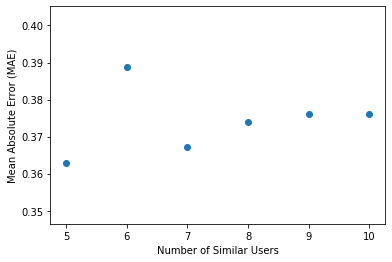

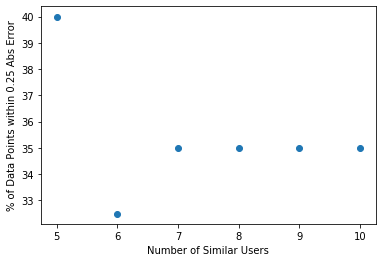

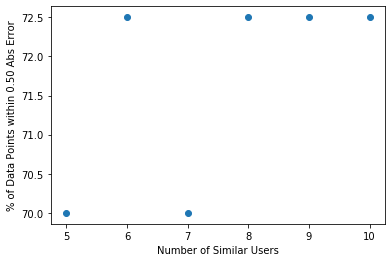

In [20]:
plt.scatter(n_users_list, mae_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(n_users_list, quarter_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(n_users_list, half_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

### ElasticNet

In [21]:
rand_state = 10

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.linear_model import ElasticNetCV
    model = ElasticNetCV(fit_intercept=False, normalize=False, cv=5, random_state=rand_state)
    model.fit(x, y)

    # Evaluate model on user's data 
    preds = model.predict(X_test)
    
    # unscale
    preds_unscaled = Y_scaler.inverse_transform(preds)
    y_test_unscaled = Y_scaler.inverse_transform(y_test)

    # evaluate results
    results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
    results_df.columns = ['predicted', 'actual']
    results_df['error'] = results_df['predicted'] - results_df['actual']
    results_df['abs_error'] = abs(results_df['error'])

    # Performance Metrics 
    mae = np.mean(results_df['abs_error'])
    print('MAE =', mae, "for n =", n)
    
    quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
    half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
    mae_list.append(mae)

MAE = 0.3625150438450672 for n = 5
MAE = 0.4007440010969468 for n = 6
MAE = 0.36428370629832635 for n = 7
MAE = 0.3723881945695085 for n = 8
MAE = 0.37567591498233655 for n = 9
MAE = 0.37653280969441094 for n = 10


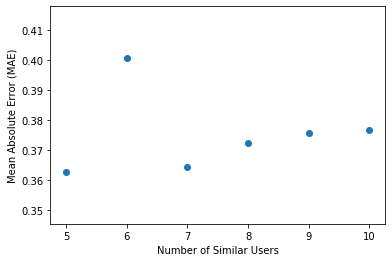

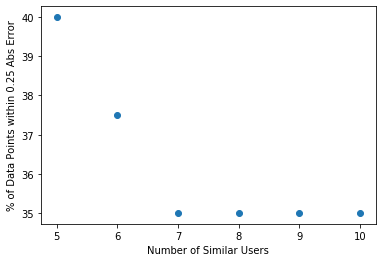

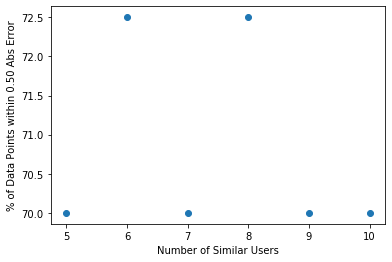

In [22]:
plt.scatter(n_users_list, mae_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(n_users_list, quarter_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(n_users_list, half_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

### SVR, C = 0.5

In [23]:
rand_state = 10

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.svm import SVR
    
    for C in[0.5]:
        model = SVR(kernel='linear', epsilon=0.25, C=C)
        model.fit(x, y)

        # Evaluate model on user's data 
        preds = model.predict(X_test)

        # unscale
        preds_unscaled = Y_scaler.inverse_transform(preds)
        y_test_unscaled = Y_scaler.inverse_transform(y_test)

        # evaluate results
        results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
        results_df.columns = ['predicted', 'actual']
        results_df['error'] = results_df['predicted'] - results_df['actual']
        results_df['abs_error'] = abs(results_df['error'])

        # Performance Metrics 
        mae = np.mean(results_df['abs_error'])
        print('MAE =', mae, "for n =", n)

        quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
        half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
        mae_list.append(mae)

MAE = 0.36528914956658465 for n = 5
MAE = 0.39840762323743273 for n = 6
MAE = 0.365023612870256 for n = 7
MAE = 0.37190274456351397 for n = 8
MAE = 0.37776764732617035 for n = 9
MAE = 0.3773941100438785 for n = 10


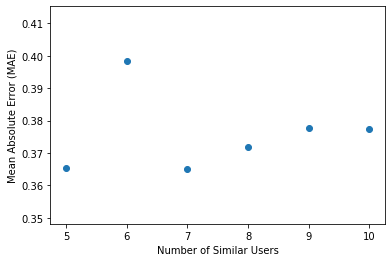

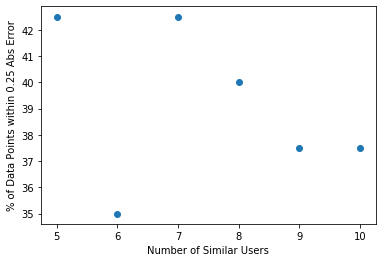

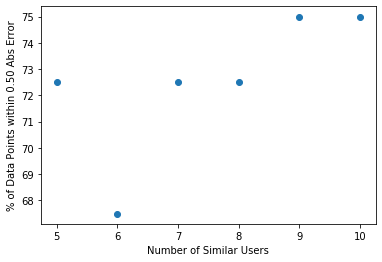

In [24]:
plt.scatter(n_users_list, mae_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(n_users_list, quarter_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(n_users_list, half_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

### SVR, vary C

In [25]:
rand_state = 10
c_list = [0.1, 1.0, 10.0]

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.svm import SVR
    
    for C in c_list:
        model = SVR(kernel='linear', epsilon=0.25, C=C)
        model.fit(x, y)

        # Evaluate model on user's data 
        preds = model.predict(X_test)

        # unscale
        preds_unscaled = Y_scaler.inverse_transform(preds)
        y_test_unscaled = Y_scaler.inverse_transform(y_test)

        # evaluate results
        results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
        results_df.columns = ['predicted', 'actual']
        results_df['error'] = results_df['predicted'] - results_df['actual']
        results_df['abs_error'] = abs(results_df['error'])

        # Performance Metrics 
        mae = np.mean(results_df['abs_error'])
        print('MAE =', mae, "for n =", n)

        quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
        half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
        mae_list.append(mae)

MAE = 0.36240224350886063 for n = 5
MAE = 0.3776651630916692 for n = 5
MAE = 0.375893901231085 for n = 5
MAE = 0.3931656430583548 for n = 6
MAE = 0.398511429379144 for n = 6
MAE = 0.39887565807379477 for n = 6
MAE = 0.3602247849753709 for n = 7
MAE = 0.36630067201738437 for n = 7
MAE = 0.36653549755244025 for n = 7
MAE = 0.3579201620838185 for n = 8
MAE = 0.37198698986535766 for n = 8
MAE = 0.37077039738482076 for n = 8
MAE = 0.36606880643109807 for n = 9
MAE = 0.3774872753416876 for n = 9
MAE = 0.37664150868799806 for n = 9
MAE = 0.36605454631243994 for n = 10
MAE = 0.37708725712956265 for n = 10
MAE = 0.37650407258043056 for n = 10


In [26]:
len(mae_list)

18

## 2. Change Imputation Method on Filling Similarity Matrix - Use Beer (Col) Mean

In [29]:
piv =  pd.pivot_table(data=df, values='user_rating', index='username', columns='beer_name', 
                      aggfunc='mean').reset_index()
piv.head()

beer_name,username,!Wild Blend! (Morango+Amora),"""33"" Export","""Body"" System","""British Bitter"" English Pale Ale","""Calcium"" Blood Orange","""Craft Beer"" Dark Lager Dry Hopped Oct. 2017","""Cream Soda"" Wheat IPA","""Cult of Pekko"" Hop-Scotch IPA (2017)","""K"" is for Kriek",...,分 桃 (Fēn Táo),分 桃 (Fēn Táo) (Blend 2),废都 (Two Lost Capitals),日本から来たネコ (Some Cat From Japan),日本で人気がある Big In Japan DDH IPA,木島平村 Hard Cider #39,藻細工S-IPA (mosaic S-IPA),調和,黄雪 (おうせき) - Yellow Snow,광화문 Seoulite Ale
0,AFernan25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AlexKress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Asier05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Audyoh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boat,0.449727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
piv = piv.fillna(piv.mean())
piv.head()

beer_name,username,!Wild Blend! (Morango+Amora),"""33"" Export","""Body"" System","""British Bitter"" English Pale Ale","""Calcium"" Blood Orange","""Craft Beer"" Dark Lager Dry Hopped Oct. 2017","""Cream Soda"" Wheat IPA","""Cult of Pekko"" Hop-Scotch IPA (2017)","""K"" is for Kriek",...,分 桃 (Fēn Táo),分 桃 (Fēn Táo) (Blend 2),废都 (Two Lost Capitals),日本から来たネコ (Some Cat From Japan),日本で人気がある Big In Japan DDH IPA,木島平村 Hard Cider #39,藻細工S-IPA (mosaic S-IPA),調和,黄雪 (おうせき) - Yellow Snow,광화문 Seoulite Ale
0,AFernan25,0.449727,-2.902376,0.449727,0.252544,0.449727,-1.522098,0.449727,0.055362,0.548318,...,0.449727,0.844092,-0.339003,0.449727,0.449727,-0.339003,0.055362,0.055362,-0.141821,-1.522098
1,AlexKress,0.449727,-2.902376,0.449727,0.252544,0.449727,-1.522098,0.449727,0.055362,0.548318,...,0.449727,0.844092,-0.339003,0.449727,0.449727,-0.339003,0.055362,0.055362,-0.141821,-1.522098
2,Asier05,0.449727,-2.902376,0.449727,0.252544,0.449727,-1.522098,0.449727,0.055362,0.548318,...,0.449727,0.844092,-0.339003,0.449727,0.449727,-0.339003,0.055362,0.055362,-0.141821,-1.522098
3,Audyoh,0.449727,-2.902376,0.449727,0.252544,0.449727,-1.522098,0.449727,0.055362,0.548318,...,0.449727,0.844092,-0.339003,0.449727,0.449727,-0.339003,0.055362,0.055362,-0.141821,-1.522098
4,Boat,0.449727,-2.902376,0.449727,0.252544,0.449727,-1.522098,0.449727,0.055362,0.548318,...,0.449727,0.844092,-0.339003,0.449727,0.449727,-0.339003,0.055362,0.055362,-0.141821,-1.522098


In [31]:
X = piv[piv['username'] == 'tsharp93'].drop('username', axis=1)
Y = piv[piv['username'] != 'tsharp93'].drop('username', axis=1)
Y.head()

beer_name,!Wild Blend! (Morango+Amora),"""33"" Export","""Body"" System","""British Bitter"" English Pale Ale","""Calcium"" Blood Orange","""Craft Beer"" Dark Lager Dry Hopped Oct. 2017","""Cream Soda"" Wheat IPA","""Cult of Pekko"" Hop-Scotch IPA (2017)","""K"" is for Kriek","""Not Just Some"" Oatmeal Stout",...,分 桃 (Fēn Táo),分 桃 (Fēn Táo) (Blend 2),废都 (Two Lost Capitals),日本から来たネコ (Some Cat From Japan),日本で人気がある Big In Japan DDH IPA,木島平村 Hard Cider #39,藻細工S-IPA (mosaic S-IPA),調和,黄雪 (おうせき) - Yellow Snow,광화문 Seoulite Ale
0,0.449727,-2.902376,0.449727,0.252544,0.449727,-1.522098,0.449727,0.055362,0.548318,1.238457,...,0.449727,0.844092,-0.339003,0.449727,0.449727,-0.339003,0.055362,0.055362,-0.141821,-1.522098
1,0.449727,-2.902376,0.449727,0.252544,0.449727,-1.522098,0.449727,0.055362,0.548318,1.238457,...,0.449727,0.844092,-0.339003,0.449727,0.449727,-0.339003,0.055362,0.055362,-0.141821,-1.522098
2,0.449727,-2.902376,0.449727,0.252544,0.449727,-1.522098,0.449727,0.055362,0.548318,1.238457,...,0.449727,0.844092,-0.339003,0.449727,0.449727,-0.339003,0.055362,0.055362,-0.141821,-1.522098
3,0.449727,-2.902376,0.449727,0.252544,0.449727,-1.522098,0.449727,0.055362,0.548318,1.238457,...,0.449727,0.844092,-0.339003,0.449727,0.449727,-0.339003,0.055362,0.055362,-0.141821,-1.522098
4,0.449727,-2.902376,0.449727,0.252544,0.449727,-1.522098,0.449727,0.055362,0.548318,1.238457,...,0.449727,0.844092,-0.339003,0.449727,0.449727,-0.339003,0.055362,0.055362,-0.141821,-1.522098


In [32]:
sim = cosine_similarity(X,Y)[0].tolist()
names = piv[piv['username'] != 'tsharp93']['username']

sim_df = pd.DataFrame({'username':names, 'sim_score':sim})
sim_df.sort_values(by='sim_score', ascending=False).head()

,username,sim_score
17,Gmlman,0.999863
33,Mikeylga,0.999862
91,jimmyricci,0.999859
25,Justinswaldrip,0.999858
97,kwitnes,0.999858


#### Scale

In [33]:
X_scaler.fit(df[['ABV', 'IBU', 'global_rating']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
df[['ABV', 'IBU', 'global_rating']] = X_scaler.transform(df[['ABV', 'IBU', 'global_rating']])

In [35]:
Y_scaler.fit(np.array(df['user_rating']).reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
df['user_rating'] = Y_scaler.transform(np.array(df['user_rating']).reshape(-1,1))

In [37]:
df.head()

,username,beer_name,ABV,IBU,global_rating,total,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,...,beertype_Table Beer,beertype_Traditional Ale,beertype_Wheat Beer - American Pale Wheat,beertype_Wheat Beer - Other,beertype_Wheat Wine,beertype_Winter Ale,beertype_Winter Warmer,beertype_Witbier,beertype_Zoigl,user_rating
0,tnt,Society & Solitude #7,0.550358,-5.477122e-17,1.362734,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.844092
1,tnt,Riwaka Single Hop Pale Ale,-0.649155,-5.477122e-17,0.905142,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.027187
2,tnt,"Walk, Don't Run",-1.291751,-5.477122e-17,0.828877,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.238457
3,tnt,Czech Two,-1.120392,-2.343671e-01,0.275954,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.844092
4,tnt,Spirit of Revolt,0.636038,3.561648e-01,0.295020,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.449727


### Lasso

In [38]:
rand_state = 10

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.linear_model import LassoCV
    model = LassoCV(fit_intercept=False, normalize=False, cv=5, random_state=rand_state)
    model.fit(x, y)

    # Evaluate model on user's data 
    preds = model.predict(X_test)
    
    # unscale
    preds_unscaled = Y_scaler.inverse_transform(preds)
    y_test_unscaled = Y_scaler.inverse_transform(y_test)

    # evaluate results
    results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
    results_df.columns = ['predicted', 'actual']
    results_df['error'] = results_df['predicted'] - results_df['actual']
    results_df['abs_error'] = abs(results_df['error'])

    # Performance Metrics 
    mae = np.mean(results_df['abs_error'])
    print('MAE =', mae, "for n =", n)
    
    quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
    half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
    mae_list.append(mae)

MAE = 0.5968023789476817 for n = 5


C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003748267120363691, tolerance: 0.0003623769856984212
  positive)
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0054410418018792095, tolerance: 0.0003623769856984212
  positive)
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007893745321347012, tolerance: 0.0003623769856984212
  positive)
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\env

C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013982479529134617, tolerance: 0.00043331961804265903
  positive)
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013488642362468856, tolerance: 0.00043331961804265903
  positive)
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012969666016050124, tolerance: 0.00043331961804265903
  positive)
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\en

MAE = 0.6201342124389833 for n = 6


C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015369690165671912, tolerance: 0.0004538515469158356
  positive)
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006879898994612277, tolerance: 0.0004538515469158356
  positive)
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012032492979279108, tolerance: 0.0004538515469158356
  positive)
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs

C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03311419261546833, tolerance: 0.0005362864869245996
  positive)
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.041414336068252955, tolerance: 0.0005362864869245996
  positive)
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04558891556319611, tolerance: 0.0005362864869245996
  positive)
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml

MAE = 0.6211248970077186 for n = 7


C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006377206443356265, tolerance: 0.0021646107637626677
  positive)
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023196078628537897, tolerance: 0.0021646107637626677
  positive)
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02035194299859011, tolerance: 0.0021646107637626677
  positive)
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\m

MAE = 0.6211248970077186 for n = 8
MAE = 0.6349653847798123 for n = 9
MAE = 0.6349653847798123 for n = 10


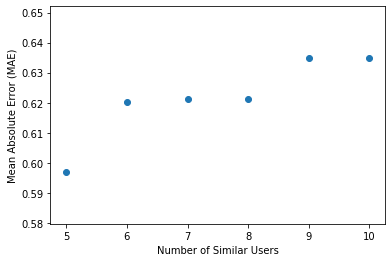

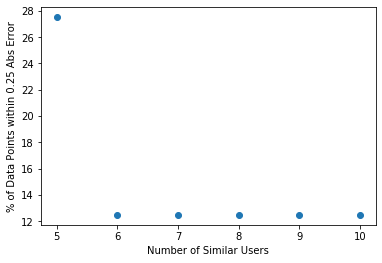

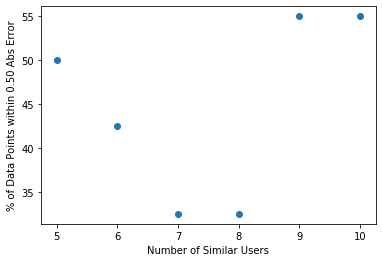

In [39]:
plt.scatter(n_users_list, mae_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(n_users_list, quarter_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(n_users_list, half_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

### ElasticNet

In [40]:
rand_state = 10

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []
for n in n_users_list:

    # get data for top n users similar to selected user
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]

    # exclude rows where user/global rating is not available
    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    # split data
    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)
    X_test = df[df['username'] == 'tsharp93'].drop(['username', 'beer_name', 'user_rating'], axis=1)
    y_test = df[df['username'] == 'tsharp93']['user_rating']

    # Train model
    from sklearn.linear_model import ElasticNetCV
    model = ElasticNetCV(fit_intercept=False, normalize=False, cv=5, random_state=rand_state)
    model.fit(x, y)

    # Evaluate model on user's data 
    preds = model.predict(X_test)
    
    # unscale
    preds_unscaled = Y_scaler.inverse_transform(preds)
    y_test_unscaled = Y_scaler.inverse_transform(y_test)

    # evaluate results
    results_df = pd.DataFrame([preds_unscaled, y_test_unscaled]).transpose()
    results_df.columns = ['predicted', 'actual']
    results_df['error'] = results_df['predicted'] - results_df['actual']
    results_df['abs_error'] = abs(results_df['error'])

    # Performance Metrics 
    mae = np.mean(results_df['abs_error'])
    print('MAE =', mae, "for n =", n)
    
    quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
    half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
    mae_list.append(mae)

MAE = 0.6349653847798122 for n = 5


C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000465067165000721, tolerance: 0.0003623769856984212
  positive)
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006176257165735333, tolerance: 0.0003623769856984212
  positive)


MAE = 0.6180399020932179 for n = 6
MAE = 0.6211248970077186 for n = 7
MAE = 0.6211248970077186 for n = 8
MAE = 0.6349653847798123 for n = 9
MAE = 0.6349653847798123 for n = 10


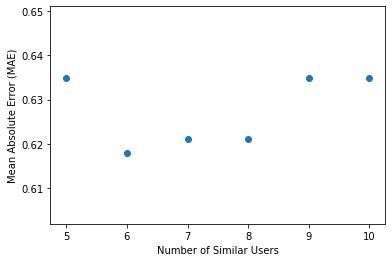

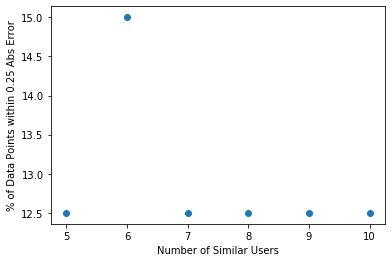

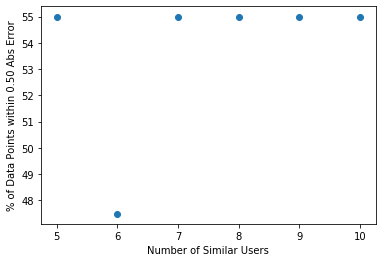

In [41]:
plt.scatter(n_users_list, mae_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

plt.scatter(n_users_list, quarter_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

plt.scatter(n_users_list, half_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

## More Top Users

In [55]:
n_users_list = range(5,26)

for n in n_users_list:
    top_n = list(sim_df.sort_values('sim_score', ascending=False)[0:n]['username'])
    top_n_df = df[df['username'].isin(top_n)]
    print("N = {}, # Points = {}".format(n, len(top_n_df)))

N = 5, # Points = 178
N = 6, # Points = 180
N = 7, # Points = 183
N = 8, # Points = 258
N = 9, # Points = 283
N = 10, # Points = 284
N = 11, # Points = 287
N = 12, # Points = 312
N = 13, # Points = 337
N = 14, # Points = 362
N = 15, # Points = 365
N = 16, # Points = 388
N = 17, # Points = 463
N = 18, # Points = 480
N = 19, # Points = 493
N = 20, # Points = 543
N = 21, # Points = 556
N = 22, # Points = 569
N = 23, # Points = 594
N = 24, # Points = 601
N = 25, # Points = 615
